# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  


Unique crop types: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Missing values in each column:
 N       0
P       0
K       0
ph      0
crop    0
dtype: int64

Data types for each column:
 N         int64
P         int64
K         int64
ph      float64
crop     object
dtype: object

F1 scores for each feature:
 {'N': 0.10507916708090527, 'P': 0.10457380486654515, 'K': 0.2007873036107074, 'ph': 0.04532731061152114}


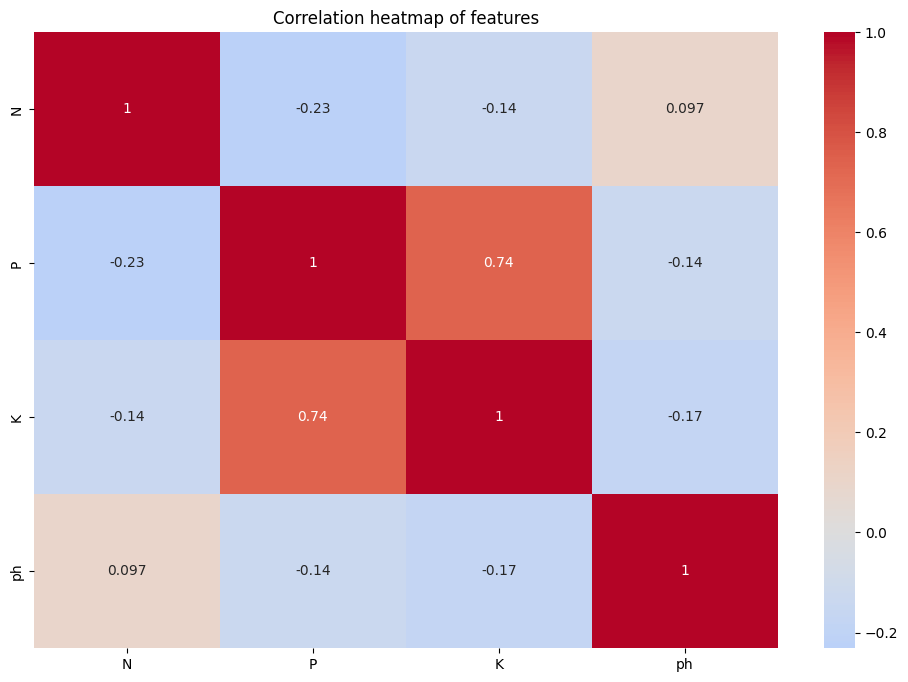


Model performance with selected features: 0.5343747459907262


In [26]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Data checks
print("Unique crop types:", crops['crop'].unique())
print("\nMissing values in each column:\n", crops.isnull().sum())
print("\nData types for each column:\n", crops.dtypes)

# Split the data into training and test sets
X = crops.drop("crop", axis=1)
y = crops["crop"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict the "crop" type using each feature individually
f1_scores = {}
for feature in X.columns:
    # Create and fit the model
    model = LogisticRegression(max_iter=2000, multi_class='multinomial')
    model.fit(X_train[[feature]], y_train)
    
    # Predict and calculate the F1 score
    y_pred = model.predict(X_test[[feature]])
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[feature] = f1
print("\nF1 scores for each feature:\n", f1_scores)
# Check for multicollinearity through correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation heatmap of features")
plt.show()

final_features = ['K','N','ph']

# Subset the data using the final_features
X_final = crops[final_features]

# Re-split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=42)


# Train and test the final Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial')
log_reg.fit(X_train, y_train)
y_pred_final = log_reg.predict(X_test)

# Evaluate model performance
model_performance = f1_score(y_test, y_pred_final, average='weighted')
print("\nModel performance with selected features:", model_performance)
